In [1]:
from lossy_modes import Array
import numpy as np
import matplotlib.pyplot as plt

In [668]:
n_jct = 20
n_plot = 10
lj = 15/n_jct
cj = 1/(lj*(15*2*np.pi)**2)
rjs = 0 #Fixed for Q factor linked to this loss at 10**6
rjp = np.inf #Fixed for Q factor linked to this loss at 10**6
cg = 0.04e-6
rg = np.inf #Fixed for Q factor linked to this loss at 10**6
ct = 6.5e-5

q0_var_rjs, q0_var_rjp, q0_var_rg = [], [], []
#var_rjs,var_rjp,var_rg = 7.18364016e-5,7.03064222e7,2.85527807e9 #Fixed for Q factor linked to this loss at 10**6, and 20 junctions in bare mode
var_rjs,var_rjp,var_rg = 5.556779487e-3,2.559081194e7,1.03929175e9

res_compute = Array(n_jct,[lj,cj,var_rjs,rjp,cg,rg,ct])
res_compute.resonator_correction()
q0_var_rjs = res_compute.get_resonator_q()

res_compute = Array(n_jct,[lj,cj,rjs,var_rjp,cg,rg,ct])
res_compute.resonator_correction()
q0_var_rjp = res_compute.get_resonator_q()

res_compute = Array(n_jct,[lj,cj,rjs,rjp,cg,var_rg,ct])
res_compute.resonator_correction()
q0_var_rg = res_compute.get_resonator_q()

Q_rjs : 0.00017273833509534597 | Q_rjp : 0.0002913294592872262 | Q_rg : 0.006409402354620397


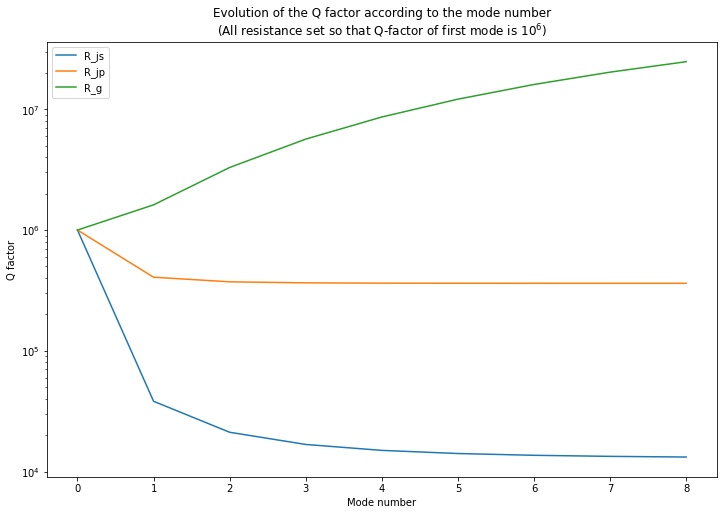

In [670]:
print(f"Q_rjs : {q0_var_rjs[0]-1e6} | Q_rjp : {q0_var_rjp[0]-1e6} | Q_rg : {q0_var_rg[0]-1e6}")
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(q0_var_rjs,label="R_js")
ax.plot(q0_var_rjp,label="R_jp")
ax.plot(q0_var_rg,label="R_g")
ax.legend()
ax.set_xlabel("Mode number")
ax.set_ylabel("Q factor")
ax.set_title("Evolution of the Q factor according to the mode number\n"+r"(All resistance set so that Q-factor of first mode is $10^6$)")
ax.set_yscale("log")
#fig.savefig("graphs/Q_factor_evolution_all_in_resonator.jpg")

In [681]:
n_jct = 20
n_plot = 10
lj = 15/n_jct
cj = 1/(lj*(15*2*np.pi)**2)
rjs = 0 #Fixed for Q factor linked to this loss at 10**6
rjp = np.inf #Fixed for Q factor linked to this loss at 10**6
cg = 0.04e-6
rg = np.inf #Fixed for Q factor linked to this loss at 10**6
ct = 6.5e-5

q0_var_rjs, q0_var_rjp, q0_var_rg = [], [], []
# var_rjs,var_rjp,var_rg = 7.18e-5,7.032e7,2.856e9 #Fixed for Q factor linked to this loss at 10**6, and 20 junctions
var_rjs,var_rjp,var_rg = 5.556779487e-3,2.559081194e7,1.03929175e9
n_var = range(5,101)
for n_jct in n_var:
    res_compute = Array(n_jct,[lj,cj,var_rjs,rjp,cg,rg,ct])
    res_compute.resonator_correction()
    q0_var_rjs.append(res_compute.get_resonator_q())

    res_compute = Array(n_jct,[lj,cj,rjs,var_rjp,cg,rg,ct])
    res_compute.resonator_correction()
    q0_var_rjp.append(res_compute.get_resonator_q())

    res_compute = Array(n_jct,[lj,cj,rjs,rjp,cg,var_rg,ct])
    res_compute.resonator_correction()
    q0_var_rg.append(res_compute.get_resonator_q())

C:\Users\rroussea\Desktop\Work\JJarray_formal\lossy_modes.py:70: RuntimeWarning: divide by zero encountered in double_scalars
  return [(m / self._lj + wk ** 2 * (self._cg / 2 + self._cj * m)) / (2 * wk * (


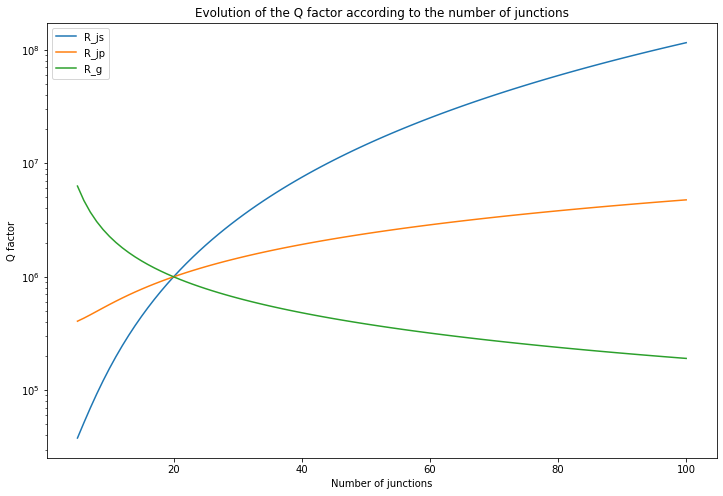

In [683]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(n_var, [el[0] for el in q0_var_rjs], label="R_js")
ax.plot(n_var, [el[0] for el in q0_var_rjp],label="R_jp")
ax.plot(n_var, [el[0] for el in q0_var_rg],label="R_g")
ax.legend()
ax.set_xlabel("Number of junctions")
ax.set_ylabel("Q factor")
ax.set_title("Evolution of the Q factor according to the number of junctions")
ax.set_yscale("log")
#fig.savefig("graphs/Q_factor_evolution_number_jct_R_j_in_resonator.jpg")

In [61]:
n_jct = 20
n_plot = 10
lj = 15/n_jct
cj = 1/(lj*(15*2*np.pi)**2)
rjs = 0 #Fixed for Q factor linked to this loss at 10**6
rjp = np.inf #Fixed for Q factor linked to this loss at 10**6
cg = 0.04e-6
rg = np.inf #Fixed for Q factor linked to this loss at 10**6
ct = 6.5e-5

q0_var_rjs, q0_var_rjp, q0_var_rg = [], [], []
#var_rjs,var_rjp,var_rg = 7.18e-5,7.032e7,2.856e9 #Fixed for Q factor linked to this loss at 10**6, and 20 junctions
var_rjs,var_rjp,var_rg = 5.556779487e-3,2.559081194e7,1.03929175e9

lc_cst = 15*6.5e-5
l_j_lst = np.linspace(1,100,500)
c_t_list = [lc_cst/l for l in l_j_lst]
l_j_utils = [el/n_jct for el in l_j_lst]
c_j_list = [1/(l*(15*2*np.pi)**2) for l in l_j_utils]
for lj,ct,cj in zip(l_j_utils,c_t_list,c_j_list):
    res_compute = Array(n_jct,[lj,cj,var_rjs,rjp,cg,rg,ct])
    res_compute.resonator_correction(n_corr=1)
    q0_var_rjs.append(res_compute.get_resonator_q())

    res_compute = Array(n_jct,[lj,cj,rjs,var_rjp,cg,rg,ct])
    res_compute.resonator_correction(n_corr=1)
    q0_var_rjp.append(res_compute.get_resonator_q())

    res_compute = Array(n_jct,[lj,cj,rjs,rjp,cg,var_rg,ct])
    res_compute.resonator_correction(n_corr=1)
    q0_var_rg.append(res_compute.get_resonator_q())

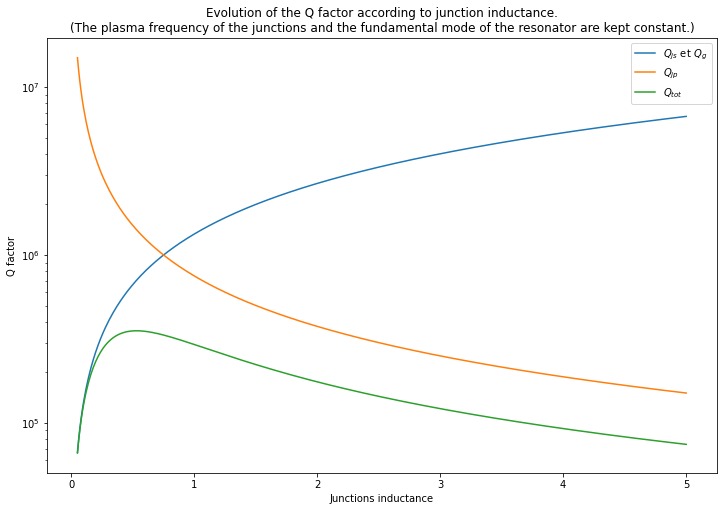

In [63]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(l_j_utils, [el[0] for el in q0_var_rjs], label=r"$Q_{js}$ et $Q_g$")
ax.plot(l_j_utils, [el[0] for el in q0_var_rjp],label=r"$Q_{jp}$")
#ax.plot(l_j_utils, [el[0] for el in q0_var_rg],label=r"$Q_g$")
ax.plot(l_j_utils, [1/(1/el1[0]+ 1/el2[0] + 1/el3[0]) for el1,el2,el3 in zip(q0_var_rjs,q0_var_rg,q0_var_rjp)],label=r"$Q_{tot}$")
ax.legend()
ax.set_xlabel("Junctions inductance")
ax.set_ylabel("Q factor")
ax.set_title("Evolution of the Q factor according to junction inductance.\n(The plasma frequency of the junctions and the fundamental mode of the resonator are kept constant.)")
ax.set_yscale("log")
fig.savefig("graphs/Q_factor_evolution_junction_impedance_20jct.jpg")